# TP5 - Inferencia Bayesiana

In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pymc3 import traceplot
import seaborn as sns

In [2]:
def correr_modelo(tiradas, caras, iteraciones, alpha, beta):
    modelo = pm.Model()
    with modelo:
        theta = pm.Beta('theta', alpha, beta) #prior de beta(1,1)
        caras = pm.Binomial('caras', n=tiradas, p=theta, observed=caras)
        trace = pm.sample(iteraciones)
    return trace, modelo

## 1. Implementacion
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [5]:
trace, modelo = correr_modelo(tiradas=6, caras=6, iteraciones=2000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:04<00:00, 624.98it/s]


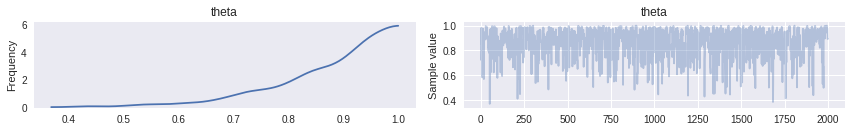

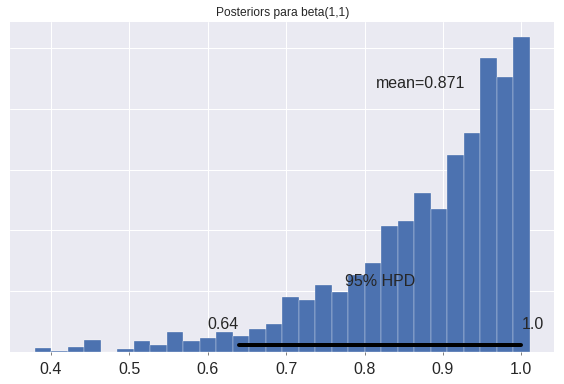

In [6]:
pm.traceplot(trace)
plt.show()
pm.plot_posterior(trace)
plt.title("Posteriors para beta(1,1)")
plt.show()

In [7]:
trace2, modelo2 = correr_modelo(tiradas=6, caras=6, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 702.12it/s]


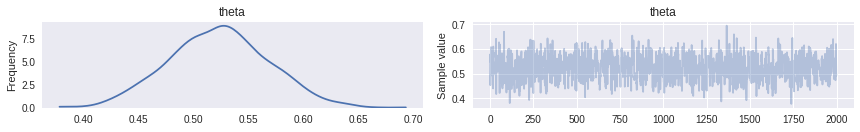

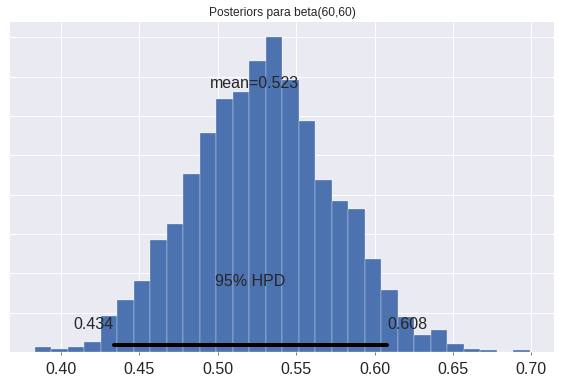

In [8]:
pm.traceplot(trace2)
plt.show()
pm.plot_posterior(trace2)
plt.title("Posteriors para beta(60,60)")
plt.show()

## 2. Resúmenes

Calcule el MAP (maximo a posteriori) y las medias de ambas posteriors.

### Posterior Nº1  - Beta(1,1)

In [9]:
MAP_1 = pm.find_MAP(model=modelo)
print("MAP: " + str(MAP_1))
print("MAP: " + str(MAP_1['theta']))

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 419.22it/s]  


MAP: {'theta': array(0.9999984620831801), 'theta_logodds__': array(13.385080233683777)}
MAP: 0.9999984620831801


In [11]:
pm.summary(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.871            0.114            0.004            [0.640, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.557          0.818          0.905          0.956          0.996



### Posterior Nº2 - Beta(100,100)

In [12]:
MAP_2 = pm.find_MAP(model=modelo2)
print("MAP: " + str(MAP_2))
print("MAP: " + str(MAP_2['theta']))

logp = -1.993, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 475.98it/s]

MAP: {'theta': array(0.5241935483368524), 'theta_logodds__': array(0.09684982578846833)}
MAP: 0.5241935483368524


In [15]:
pm.summary(trace2)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.523            0.045            0.001            [0.434, 0.608]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.436          0.493          0.524          0.553          0.613



## 3. Predicción
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [16]:
def prediccion(tiradas, p):
    j=0
    new_coin=np.random.binomial(n=tiradas,p=p,size=100)
    for i in new_coin:
        if new_coin[i]==1:
            j+=1
    print("Probabilidad de que la nueva tirada sea cara:" + str(j)+ "%")

### Predicción Nº1  - Beta(1,1)

In [17]:
prediccion(1,MAP_1['theta'])

Probabilidad de que la nueva tirada sea cara:100%


### Predicción Nº2  - Beta(100,100)

In [19]:
prediccion(1,MAP_2['theta'])

Probabilidad de que la nueva tirada sea cara:53%


## 4. Otros datos

Repita los puntos anteriores para una situacion en la que se observan 20 caras de 20 tiradas, y otra en la que se observan 3 caras de 3 tiradas. ¿Que puede concluir de los priors elegidos? ¿Y del modelo en general?

### 20 caras de 20 tiradas

#### Prior Nº1

In [22]:
trace3, modelo3 = correr_modelo(tiradas=20, caras=20, iteraciones=2500, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 98%|█████████▊| 2945/3000 [00:04<00:00, 650.87it/s]/home/nico/.local/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3000/3000 [00:04<00:00, 650.21it/s]


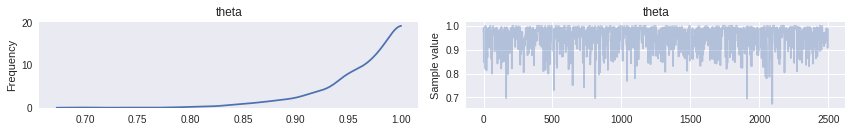

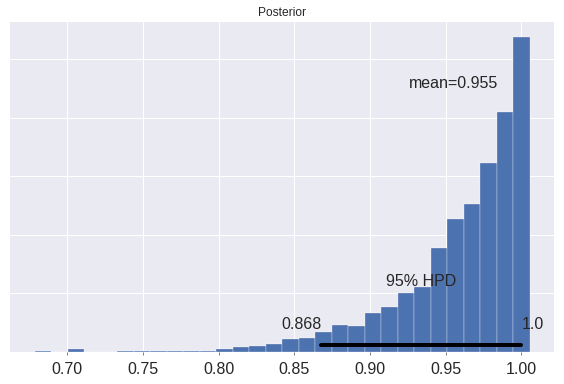

In [23]:
pm.traceplot(trace3)
plt.show()
pm.plot_posterior(trace3)
plt.title("Posterior")
plt.show()

In [24]:
MAP = pm.find_MAP(model=modelo3)
print("MAP: " + str(MAP))
print("MAP:"+str(MAP['theta']))

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 505.94it/s]  

MAP: {'theta': array(0.9999996155210419), 'theta_logodds__': array(14.771376390280462)}
MAP:0.9999996155210419


In [25]:
prediccion(1,MAP['theta'])

Probabilidad de que la nueva tirada sea cara:100%


#### Prior Nº2

In [26]:
trace4, modelo4 = correr_modelo(tiradas=20, caras=20, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 643.41it/s]


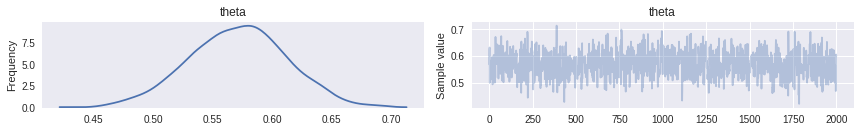

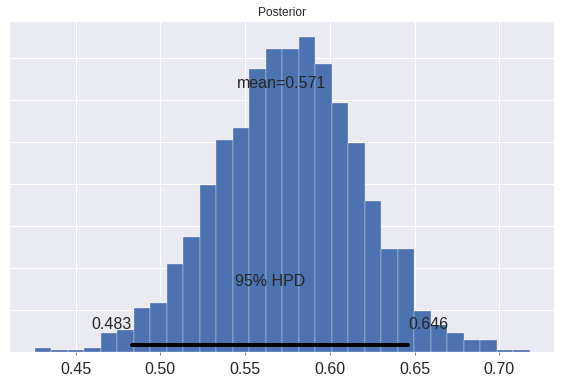

In [27]:
pm.traceplot(trace4)
plt.show()
pm.plot_posterior(trace4)
plt.title("Posterior")
plt.show()

In [28]:
MAP = pm.find_MAP(model=modelo4)
print("MAP: " + str(MAP))
print("MAP:"+str(MAP['theta']))

logp = -11.697, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 337.85it/s]

MAP: {'theta': array(0.5724637662218673), 'theta_logodds__': array(0.29191040082245656)}
MAP:0.5724637662218673


In [29]:
prediccion(1,MAP['theta'])

Probabilidad de que la nueva tirada sea cara:100%


### 3 caras de 3 tiradas

#### Prior Nº1

In [30]:
trace5, modelo5 = correr_modelo(tiradas=3, caras=3, iteraciones=2000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:04<00:00, 621.66it/s]


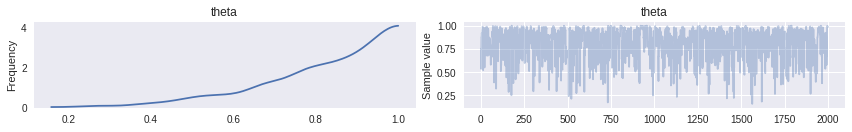

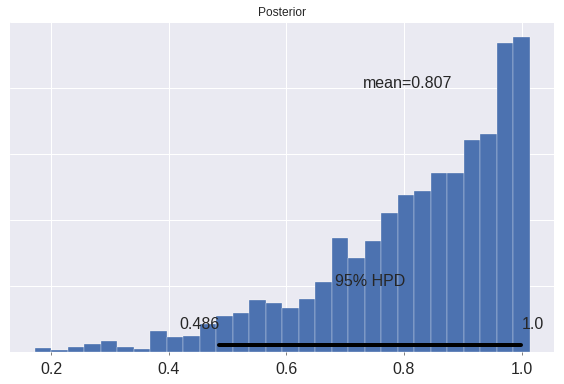

In [31]:
pm.traceplot(trace5)
plt.show()
pm.plot_posterior(trace5)
plt.title("Posterior")
plt.show()

In [32]:
MAP = pm.find_MAP(model=modelo5)
print("MAP: " + str(MAP))
print("MAP:"+str(MAP['theta']))

logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 676.63it/s]  

MAP: {'theta': array(0.999996924163579), 'theta_logodds__': array(12.691930611010052)}
MAP:0.999996924163579


In [33]:
prediccion(1,MAP['theta'])

Probabilidad de que la nueva tirada sea cara:100%


#### Prior Nº2

In [34]:
trace6, modelo6 = correr_modelo(tiradas=3, caras=3, iteraciones=2000, alpha=60, beta=60)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:04<00:00, 541.96it/s]


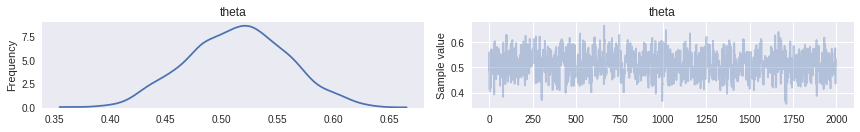

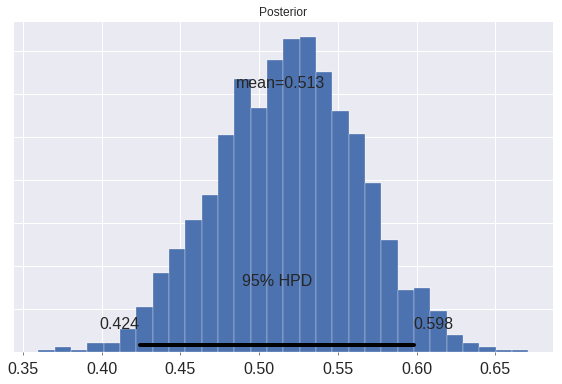

In [35]:
pm.traceplot(trace6)
plt.show()
pm.plot_posterior(trace6)
plt.title("Posterior")
plt.show()

In [36]:
MAP = pm.find_MAP(model=modelo6)
print("MAP: " + str(MAP))
print("MAP:"+str(MAP['theta']))

logp = 0.086436, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 359.77it/s]

MAP: {'theta': array(0.5123966942124236), 'theta_logodds__': array(0.04959694112955643)}
MAP:0.5123966942124236


In [37]:
prediccion(1,MAP['theta'])

Probabilidad de que la nueva tirada sea cara:53%


El resultado de los posteriors con el Prior Beta(1,1), en ambos casos (3/3 y 20/20), permiten inferir que la la moneda está cargada. Mientras que con el Prior Beta(60,60), si bien para el caso de 20 caras en 20 tiradas la probabilidad máxima se encuentra un poco sesgada a la derecha respecto de la probalidad 0.5, no se encuentra tan sesgada a la derecha como uno esperaría en un caso como este, donde asumimos que 20 caras en 20 tirdas es evidencia razonable para pensar que la moneda esta cargada.

Por lo tanto, para el caso de 3 caras en 3 tiradas el Prior Beta(60,60) resultaría en un postirior más acorde a lo que uno esperaría (que no hay evidencia suficiente para pensar que la moneda esta cargada p=0.5), mientras que del Prior Beta(1,1) surge que la moneda se encontraría cargada lo que resulta más adecuada para el caso de 20 caras de 20 tiradas.

## 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.

En función de lo dicho en el punto anterior, necesitamos crear un prior que de muestra de nuestras propia experiencia, es decir que si de tres tiradas salen 3 caras no es evidencia suficiente para pensar que la moneda está cargada pero que si de 20 tiradas salen 20 caras sí lo es. Dicho esto proponemos que ya 12 caras consecutivas nos harían sospechar, a partir de este número proponemos que no sería casualidad y que podríamos empezar a pensar que la moneda esta cargada. Por lo tanto, vamos a buscar los valores de alpha y beta que den un prior que represente nuestra experiencia previa.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 640.60it/s]


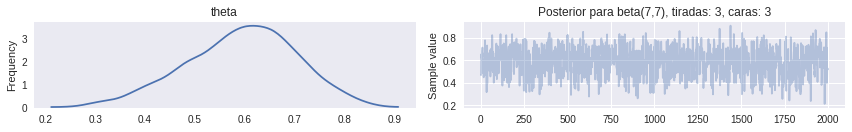

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:04<00:00, 558.03it/s]


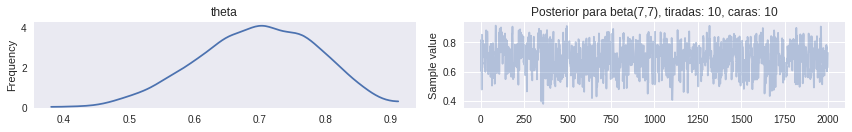

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:05<00:00, 478.91it/s]


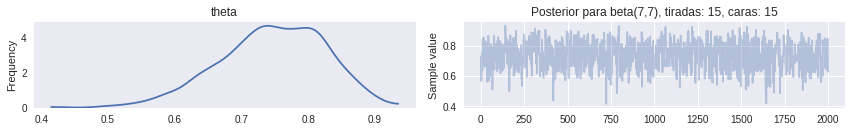

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:05<00:00, 475.10it/s]


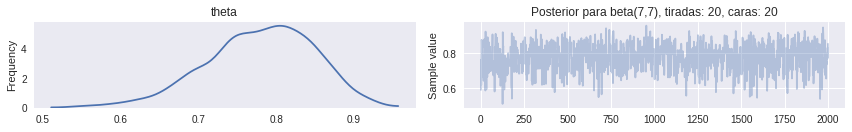

In [48]:
tiradas=[3,10,15,20]
for tirada in tiradas:
    trace7, modelo7 = correr_modelo(tiradas=tirada, caras=tirada, iteraciones=2000, alpha=8, beta=8)
    pm.traceplot(trace7)
    plt.title("Posterior para beta(7,7), "+"tiradas: "+str(tirada)+", caras: " + str(tirada))
    plt.show()

Tomando un Prior Beta, con alpha=beta=8, encontramos que los posteriors representan nuestra experiencia previa. Al sacar 3 caras de 3 tiradas la máxima probabilidad del posterior se encuentra alrededor de 0.5, pero al ir aumentando la cantidad de caras la probabilidad aumenta, encontrando una probailidad de 0.8 para 20 caras en 20 tiradas. 